In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    
    res = y - np.dot(tx,w)
    mse = (np.dot(res.T,res)/(2*len(y)))
    
    return mse
    
    # ***************************************************
    raise NotImplementedError

In [5]:
w = np.array([0,0])
compute_loss(y,tx,w)

2792.2367127591669

# 2 Grid Search

Fill in the function `grid_search()` below:

In [6]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    for i, x0 in enumerate(w0):
        for j, x1  in enumerate(w1):
            losses[i][j] = compute_loss(y, tx, np.array([x0,x1]))
    # ***************************************************
    return losses
    raise NotImplementedError

Let us play with the grid search demo now!

Grid Search: loss*=18.79354101952324, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.092 seconds


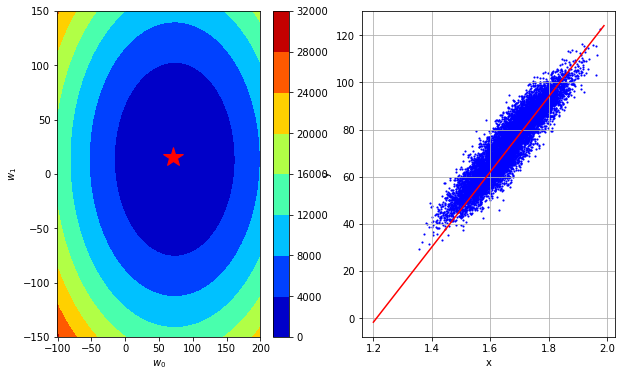

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [8]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    gradient = (-1/len(y))*np.dot(tx.T, y - np.dot(tx,w))
    # ***************************************************
    print(gradient)
    return gradient
    raise NotImplementedError

In [9]:
compute_gradient(y,tx,[1,2])

[-72.293922   -11.47971243]


array([-72.293922  , -11.47971243])

Please fill in the functions `gradient_descent` below:

In [10]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        gradient = compute_gradient(y,tx,w)
        loss = compute_loss(y, tx, w)
        
#         raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma*gradient
#         raise NotImplementedError
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
        

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [11]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

[-73.293922   -13.47971243]
Gradient Descent(0/499): loss=2792.236712759167, w0=51.305745401473644, w1=9.435798704492269
[-21.9881766   -4.04391373]
Gradient Descent(1/499): loss=265.3024621089598, w0=66.69746902191571, w1=12.266538315840005
[-6.59645298 -1.21317412]
Gradient Descent(2/499): loss=37.87837955044126, w0=71.31498610804834, w1=13.115760199244333
[-1.97893589 -0.36395224]
Gradient Descent(3/499): loss=17.41021212017447, w0=72.70024123388814, w1=13.370526764265632
[-0.59368077 -0.10918567]
Gradient Descent(4/499): loss=15.568077051450457, w0=73.11581777164007, w1=13.446956733772023
[-0.17810423 -0.0327557 ]
Gradient Descent(5/499): loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
[-0.05343127 -0.00982671]
Gradient Descent(6/499): loss=15.387363601208632, w0=73.27789262136334, w1=13.476764421879516
[-0.01602938 -0.00294801]
Gradient Descent(7/499): loss=15.38602068474353, w0=73.28911318788263, w1=13.478828031056189
[-0.00480881 -0.0008844 ]
Gradient Descen

[  2.18278728e-15  -1.02318154e-16]
Gradient Descent(272/499): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
[  2.18278728e-15  -1.02318154e-16]
Gradient Descent(273/499): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
[  2.18278728e-15  -1.02318154e-16]
Gradient Descent(274/499): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
[  2.18278728e-15  -1.02318154e-16]
Gradient Descent(275/499): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
[  2.18278728e-15  -1.02318154e-16]
Gradient Descent(276/499): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
[  2.18278728e-15  -1.02318154e-16]
Gradient Descent(277/499): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
[  2.18278728e-15  -1.02318154e-16]
Gradient Descent(278/499): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
[  2.18278728e-15  -1.02318154e-16]
Gradient Descent(279/499): loss=15.3858878688294, w0=7

In [12]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_figure>

# 4 Stochastic gradient descent

In [13]:
len(y)

10000

In [14]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    return compute_gradient(y, tx, w)
    raise NotImplementedError


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    
    ws = [initial_w]
    losses = []
    w = initial_w
    n_iter=-1
    
    for i in range(0,max_iters):
        for y_batch, tx_batch in batch_iter(y,tx,batch_size,int(np.floor(len(y)/batch_size))):
            gradient = compute_gradient(y_batch, tx_batch,w)
            loss = compute_loss(y, tx, w)

            w = w - gamma*gradient

            # store w and loss
            ws.append(w)
            losses.append(loss)
            n_iter=n_iter+1
            print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
                  bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    
    
    return losses, ws
    raise NotImplementedError

In [15]:
np.floor

<ufunc 'floor'>

In [16]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 10
gamma = 0.7
batch_size = 10

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

[-72.06192918 -12.25447362]
Gradient Descent(0/9): loss=2792.236712759167, w0=50.44335042841476, w1=8.578131532398674
[-23.03433979  -2.97947126]
Gradient Descent(1/9): loss=288.4729461633232, w0=66.56738828110616, w1=10.663761417050145
[-4.08353951 -2.99401876]
Gradient Descent(2/9): loss=41.97380588641347, w0=69.425865940481, w1=12.7595745488649
[-0.20125059 -0.39672637]
Gradient Descent(3/9): loss=23.12611600427888, w0=69.56674135651403, w1=13.037283009924193
[-3.47677108  2.19066158]
Gradient Descent(4/9): loss=22.429697549345676, w0=72.00048111237734, w1=11.503819901664755
[ 0.4525515  -1.14189266]
Gradient Descent(5/9): loss=18.174458188062722, w0=71.683695064338, w1=12.303144763862429
[-3.06854824  0.47923431]
Gradient Descent(6/9): loss=17.374459006755114, w0=73.83167883080706, w1=11.967680744922777
[ 0.43343753  0.22855849]
Gradient Descent(7/9): loss=16.673598988119483, w0=73.5282725619203, w1=11.807689802285624
[-2.05601833 -3.72916223]
Gradient Descent(8/9): loss=16.8111778

[-0.19611289 -0.56521038]
Gradient Descent(310/9): loss=15.882591159145875, w0=72.44435155677385, w1=13.735593070892497
[-1.7168855   0.21434265]
Gradient Descent(311/9): loss=15.779510289534821, w0=73.6461714061623, w1=13.58555321631206
[-0.80547443 -1.52877213]
Gradient Descent(312/9): loss=15.45352882565423, w0=74.21000350728717, w1=14.655693708347835
[ 0.48985037  1.30409134]
Gradient Descent(313/9): loss=16.49695650854292, w0=73.86710824500955, w1=13.742829771210122
[ 0.82977767  0.18625427]
Gradient Descent(314/9): loss=15.584774469666844, w0=73.28626387832848, w1=13.61245177949505
[-1.97809449  1.22103998]
Gradient Descent(315/9): loss=15.394727059049233, w0=74.67093001826771, w1=12.75772379195046
[ 1.6185184  -0.06561264]
Gradient Descent(316/9): loss=16.594597207455674, w0=73.53796714170628, w1=12.803652640579005
[-3.16306869 -1.2357315 ]
Gradient Descent(317/9): loss=15.644195306719732, w0=75.75211522144515, w1=13.668664692446933
[ 0.80572285  1.59766568]
Gradient Descent(318

Gradient Descent(665/9): loss=15.737840717621735, w0=74.6430986604385, w1=12.928939201015979
[-1.1080925  -4.40587402]
Gradient Descent(666/9): loss=16.44770227415569, w0=75.41876341242936, w1=16.01305101496301
[ 3.81971843  5.51239806]
Gradient Descent(667/9): loss=20.852265558735834, w0=72.74496051330115, w1=12.154372372592887
[-2.40426225  0.51407261]
Gradient Descent(668/9): loss=16.414830367420503, w0=74.42794408879239, w1=11.794521546291094
[-1.16863515 -2.19701795]
Gradient Descent(669/9): loss=17.448825081051897, w0=75.24598869394792, w1=13.33243410936773
[ 3.87591413 -2.97809812]
Gradient Descent(670/9): loss=17.302015506129223, w0=72.53284880051004, w1=15.417102795086016
[-0.66160921 -0.41530473]
Gradient Descent(671/9): loss=17.552244781620875, w0=72.9959752447866, w1=15.70781610397828
[-2.39249507  4.65892848]
Gradient Descent(672/9): loss=17.91249698380937, w0=74.67072179179135, w1=12.446566167415234
[ 4.82308887 -3.25992648]
Gradient Descent(673/9): loss=16.86737230437018

Gradient Descent(1005/9): loss=16.3651899629743, w0=71.71453669584409, w1=14.930057814563606
[-1.32659361  2.1651535 ]
Gradient Descent(1006/9): loss=17.68486770167277, w0=72.64315222545255, w1=13.41445036141259
[ 0.33291006  0.21630347]
Gradient Descent(1007/9): loss=15.59976808905541, w0=72.41011518572763, w1=13.26303793448912
[-1.08087848 -0.99359153]
Gradient Descent(1008/9): loss=15.79991903275056, w0=73.1667301241285, w1=13.95855200241707
[-1.2790732   0.32903602]
Gradient Descent(1009/9): loss=15.508620421408343, w0=74.06208136171787, w1=13.728226790425785
[ 1.38723032 -0.80519902]
Gradient Descent(1010/9): loss=15.711801962138754, w0=73.0910201354905, w1=14.291866103668198
[-0.20603744 -0.04401259]
Gradient Descent(1011/9): loss=15.736269243341766, w0=73.23524634589363, w1=14.322674919253615
[ 1.40874188  3.94171734]
Gradient Descent(1012/9): loss=15.742902160084073, w0=72.2491270317005, w1=11.563472782226803
[-0.57697999 -2.65579508]
Gradient Descent(1013/9): loss=17.767673337

Gradient Descent(1347/9): loss=16.549708493225964, w0=73.35386165427933, w1=14.895683873264282
[-0.19258678  3.40672106]
Gradient Descent(1348/9): loss=16.390171806786395, w0=73.4886723998293, w1=12.510979131978887
[ 0.78443851 -0.54253962]
Gradient Descent(1349/9): loss=15.87407383371674, w0=72.93956544288008, w1=12.890756866301043
[ 3.29835526  1.27599781]
Gradient Descent(1350/9): loss=15.622106485306631, w0=70.63071675863996, w1=11.997558395934115
[-5.98401156 -1.37159191]
Gradient Descent(1351/9): loss=20.030609250983158, w0=74.81952485039695, w1=12.957672732472819
[ 0.9607355   0.61476544]
Gradient Descent(1352/9): loss=16.68588261968898, w0=74.14700999712038, w1=12.527336927588337
[ 3.45124631 -1.66518948]
Gradient Descent(1353/9): loss=16.2032769859973, w0=71.73113758159933, w1=13.692969565617583
[ 0.59409174  0.86391969]
Gradient Descent(1354/9): loss=16.629774743199278, w0=71.31527336222008, w1=13.088225779799679
[-3.73594052  1.27250132]
Gradient Descent(1355/9): loss=17.420

Gradient Descent(1698/9): loss=15.726175307536602, w0=73.55282688834373, w1=12.679983347878999
[ 3.34126453 -0.17534886]
Gradient Descent(1699/9): loss=15.739187045273432, w0=71.21394171598371, w1=12.802727551501945
[-4.7553341  -2.42617028]
Gradient Descent(1700/9): loss=17.778201130391423, w0=74.54267558868061, w1=14.501046747866319
[ 2.59155626  4.57499623]
Gradient Descent(1701/9): loss=16.68714251815213, w0=72.72858620822495, w1=11.298549384546536
[-2.30307921 -2.57233713]
Gradient Descent(1702/9): loss=17.92442627505834, w0=74.34074165340421, w1=13.099185377689103
[ 0.60692414  0.14773938]
Gradient Descent(1703/9): loss=16.00620398067098, w0=73.9158947556034, w1=12.995767812472186
[ 0.42382686  2.84754777]
Gradient Descent(1704/9): loss=15.696414120707969, w0=73.61921595492764, w1=11.002484371300236
[-0.04955289 -2.27928538]
Gradient Descent(1705/9): loss=18.507125386464537, w0=73.65390297863037, w1=12.597984136758166
[ 3.2893611  -0.23613195]
Gradient Descent(1706/9): loss=15.83

Gradient Descent(2059/9): loss=17.375742123844805, w0=72.13538620208267, w1=14.074374631599095
[-1.73271678 -0.63150416]
Gradient Descent(2060/9): loss=16.233802032834852, w0=73.34828794600132, w1=14.516427543793094
[ 2.6029488   1.06802903]
Gradient Descent(2061/9): loss=15.92475480516855, w0=71.5262237827427, w1=13.76880722564587
[-1.81416644  2.8950462 ]
Gradient Descent(2062/9): loss=16.99005426519051, w0=72.79614029328347, w1=11.742274882483866
[ 0.31170443 -2.60507465]
Gradient Descent(2063/9): loss=17.019125808075735, w0=72.5779471941022, w1=13.565827138507089
[-2.85829485  1.53949814]
Gradient Descent(2064/9): loss=15.645905702757865, w0=74.5787535867678, w1=12.488178439957652
[ 0.51555513 -1.38678219]
Gradient Descent(2065/9): loss=16.702853800954184, w0=74.21786499245908, w1=13.458925969607018
[ 3.05629807 -2.75744633]
Gradient Descent(2066/9): loss=15.812939232112988, w0=72.0784563452984, w1=15.389138402357485
[-0.78648005  3.71232527]
Gradient Descent(2067/9): loss=17.94752

Gradient Descent(2436/9): loss=16.628094773619285, w0=73.06120696371974, w1=15.272364792414182
[-1.96913535  1.84701894]
Gradient Descent(2437/9): loss=17.019767250665712, w0=74.4396017098136, w1=13.979451537799063
[ 0.13621674  1.40378007]
Gradient Descent(2438/9): loss=16.167048450595495, w0=74.34424999159357, w1=12.99680548564468
[ 1.31560473 -2.86417634]
Gradient Descent(2439/9): loss=16.054081872443295, w0=73.42332667987219, w1=15.001728923431184
[-1.75900261  2.27832442]
Gradient Descent(2440/9): loss=16.552527749688252, w0=74.65462850367939, w1=13.406901832393281
[ 1.78240817 -0.73189998]
Gradient Descent(2441/9): loss=16.314299652467728, w0=73.40694278349483, w1=13.919231820264592
[ 0.4108213   2.23933219]
Gradient Descent(2442/9): loss=15.488863362358856, w0=73.11936787519502, w1=12.351699285536569
[ 2.09428127 -1.3766115 ]
Gradient Descent(2443/9): loss=16.037329273108934, w0=71.65337098309588, w1=13.315327338238475
[-0.80658772 -2.41300505]
Gradient Descent(2444/9): loss=16.

[-2.04067959  1.51341879]
Gradient Descent(2798/9): loss=15.90078459242436, w0=74.97769592028806, w1=11.43817047937444
[ 0.63370963 -2.67410988]
Gradient Descent(2799/9): loss=18.887381950873205, w0=74.53409917786634, w1=13.310047395534609
[ 2.19030486 -1.42256547]
Gradient Descent(2800/9): loss=16.169300695275385, w0=73.00088577689318, w1=14.305843227018833
[ 4.14434586  0.02407609]
Gradient Descent(2801/9): loss=15.770069026242528, w0=70.09984367740935, w1=14.28898996670476
[-1.5914413  0.6738064]
Gradient Descent(2802/9): loss=20.814421102645223, w0=71.21385258774094, w1=13.817325485873292
[-1.28322356 -0.27111922]
Gradient Descent(2803/9): loss=17.60622353917989, w0=72.11210908028161, w1=14.007108938312589
[-4.25258086  3.91803471]
Gradient Descent(2804/9): loss=16.22330229578294, w0=75.08891568430496, w1=11.264484640128677
[ 3.37166505 -3.93812102]
Gradient Descent(2805/9): loss=19.450506119958934, w0=72.72875015146336, w1=14.02116935631838
[ 2.59984943  0.09311138]
Gradient Desce

Gradient Descent(3166/9): loss=17.039168358490873, w0=72.08727734104387, w1=14.45966717540687
[ 0.55413773  1.26165586]
Gradient Descent(3167/9): loss=16.594039184496975, w0=71.69938093036079, w1=13.576508072187574
[-2.1176898   1.31981124]
Gradient Descent(3168/9): loss=16.661853181259627, w0=73.18176378744329, w1=12.652640206760195
[-2.69631162 -2.06939304]
Gradient Descent(3169/9): loss=15.734201836741194, w0=75.06918192305329, w1=14.101215335982927
[ 1.13343365  2.86878285]
Gradient Descent(3170/9): loss=17.154794690263635, w0=74.27577837107214, w1=12.093067342444847
[-2.57899105 -1.44536212]
Gradient Descent(3171/9): loss=16.82930113980834, w0=76.08107210489415, w1=13.104820827174299
[ 3.62653866  1.71104504]
Gradient Descent(3172/9): loss=19.340262575372613, w0=73.5424950461239, w1=11.90708930048201
[-1.44347469  0.13122782]
Gradient Descent(3173/9): loss=16.653353909529137, w0=74.55292732690178, w1=11.81522982575313
[ 2.1052707  -2.61289016]
Gradient Descent(3174/9): loss=17.563

Gradient Descent(3547/9): loss=16.837465386482815, w0=73.77176394241793, w1=14.184857717832925
[ 4.95116401 -0.35029256]
Gradient Descent(3548/9): loss=15.74866926374881, w0=70.30594913355286, w1=14.430062509213025
[-3.6456096  -3.09968244]
Gradient Descent(3549/9): loss=20.301461432220588, w0=72.85787585581326, w1=16.599840214426248
[-0.84611325  1.19144405]
Gradient Descent(3550/9): loss=20.348554669685278, w0=73.45015513169264, w1=15.765829381674193
[ 3.42088898  0.97839789]
Gradient Descent(3551/9): loss=18.01125761118025, w0=71.05553284505781, w1=15.080950861196497
[ 1.28263287 -1.31765855]
Gradient Descent(3552/9): loss=19.173063126804692, w0=70.15768983505599, w1=16.003311844433803
[-5.70683914  1.42820173]
Gradient Descent(3553/9): loss=23.488140961321427, w0=74.15247723624077, w1=15.003570636397248
[-1.50410833  1.51620664]
Gradient Descent(3554/9): loss=16.915518322859715, w0=75.20535306980734, w1=13.942225985349713
[ 0.26301449  0.79547296]
Gradient Descent(3555/9): loss=17.

Gradient Descent(3877/9): loss=17.755685472145274, w0=72.86578552725994, w1=13.202221383846808
[ 0.77255971 -0.1301504 ]
Gradient Descent(3878/9): loss=15.51603893110787, w0=72.32499373317806, w1=13.293326665849401
[-3.40228386 -0.11913512]
Gradient Descent(3879/9): loss=15.87266869146135, w0=74.70659243466929, w1=13.376721251583518
[ 0.92217007 -1.08939122]
Gradient Descent(3880/9): loss=16.389010336279455, w0=74.06107338492178, w1=14.139295109005296
[ 1.56534159 -0.97975888]
Gradient Descent(3881/9): loss=15.897673142839318, w0=72.9653342727035, w1=14.825126323788107
[ 0.92728517 -0.17386854]
Gradient Descent(3882/9): loss=16.34494208287278, w0=72.31623465139351, w1=14.9468343047452
[-1.99105836  1.7932897 ]
Gradient Descent(3883/9): loss=16.940047437058606, w0=73.70997550531219, w1=13.69153151433355
[-0.16691019  0.48603374]
Gradient Descent(3884/9): loss=15.494871788781985, w0=73.8268126387137, w1=13.351307895268624
[-0.63008184  0.43835875]
Gradient Descent(3885/9): loss=15.536117

Gradient Descent(4209/9): loss=18.141045668880874, w0=73.69063366803661, w1=11.314120485677307
[-0.97020768  0.59391823]
Gradient Descent(4210/9): loss=17.809472187234356, w0=74.36977904696347, w1=10.898377724140948
[-1.16283655 -0.63835561]
Gradient Descent(4211/9): loss=19.296266504029624, w0=75.18376463362851, w1=11.345226650869302
[ 1.41264857 -2.75866448]
Gradient Descent(4212/9): loss=19.449655236095552, w0=74.19491063260585, w1=13.276291787473102
[ 2.28972423  1.457791  ]
Gradient Descent(4213/9): loss=15.812468104893034, w0=72.59210367230848, w1=12.255838089311315
[ 1.35550834 -2.58519088]
Gradient Descent(4214/9): loss=16.381096559852768, w0=71.64324783162806, w1=14.065471705543555
[-4.07762101  3.59874764]
Gradient Descent(4215/9): loss=16.919807438889855, w0=74.49758254147379, w1=11.546348355871363
[ 1.85194727 -1.87000161]
Gradient Descent(4216/9): loss=17.979235547057247, w0=73.20121945421977, w1=12.85534948472108
[ 0.91581267 -1.32674094]
Gradient Descent(4217/9): loss=15

Gradient Descent(4546/9): loss=15.605404811969183, w0=71.44493973806144, w1=11.212189103068678
[-2.60815566 -2.82168439]
Gradient Descent(4547/9): loss=19.66608660560521, w0=73.27064870266052, w1=13.187368174137111
[ 0.19924624  0.0570651 ]
Gradient Descent(4548/9): loss=15.428891275489452, w0=73.13117633620324, w1=13.147422607600134
[ 0.10789162  0.91414213]
Gradient Descent(4549/9): loss=15.454339209407411, w0=73.05565220309157, w1=12.507523113822476
[ 1.25233969 -2.73882229]
Gradient Descent(4550/9): loss=15.886850155485556, w0=72.17901441803568, w1=14.424698713876207
[-1.18234384  1.05931468]
Gradient Descent(4551/9): loss=16.453896862979757, w0=73.00665510711966, w1=13.68317843768966
[-0.06258381 -1.94221752]
Gradient Descent(4552/9): loss=15.447848210434197, w0=73.05046377270249, w1=15.042730698931114
[ 0.91738202  2.40999917]
Gradient Descent(4553/9): loss=16.637036870269586, w0=72.40829635631928, w1=13.355731282005824
[ 1.35319688  0.58119969]
Gradient Descent(4554/9): loss=15.

[ 2.22824927  0.33728082]
Gradient Descent(4925/9): loss=15.792719099045414, w0=72.56790548427377, w1=12.89936289511897
[-1.02853211 -3.43543441]
Gradient Descent(4926/9): loss=15.817840655125138, w0=73.2878779586304, w1=15.304166981923004
[-2.65749323  3.10336547]
Gradient Descent(4927/9): loss=17.050223330974156, w0=75.14812321686586, w1=13.131811156014502
[ 2.51291686  0.63864433]
Gradient Descent(4928/9): loss=17.165436591195427, w0=73.38908141335365, w1=12.684760125484805
[-3.68202042 -0.33566643]
Gradient Descent(4929/9): loss=15.706390112797044, w0=75.96649570591845, w1=12.919726628255598
[ 0.99814235 -1.18693406]
Gradient Descent(4930/9): loss=19.114005021857917, w0=75.26779605906437, w1=13.750580471906437
[ 3.25204517  0.13629739]
Gradient Descent(4931/9): loss=17.37066201190938, w0=72.99136443834131, w1=13.655172301988744
[ 1.43755374  0.60050375]
Gradient Descent(4932/9): loss=15.447051490988544, w0=71.98507682264635, w1=13.234819680161774
[-2.18039262 -2.05426894]
Gradient 

[ 4.70113212 -1.12332122]
Gradient Descent(5241/9): loss=18.26918840971003, w0=72.30297473005938, w1=13.575158807487854
[-1.13768973  1.40058817]
Gradient Descent(5242/9): loss=15.881431121828513, w0=73.09935754143105, w1=12.594747085700595
[ 0.95254434 -0.34374688]
Gradient Descent(5243/9): loss=15.796397368228726, w0=72.43257650495804, w1=12.835369899403682
[-1.44433848 -1.86695503]
Gradient Descent(5244/9): loss=15.964434553139526, w0=73.44361343748028, w1=14.142238421853182
[ 0.21373245 -1.06102778]
Gradient Descent(5245/9): loss=15.616561973376875, w0=73.294000721809, w1=14.884957871346044
[ 3.17464332  3.3150872 ]
Gradient Descent(5246/9): loss=16.373245240128877, w0=71.07175039693853, w1=12.564396833228887
[-2.44844585 -2.18859452]
Gradient Descent(5247/9): loss=18.27381251564667, w0=72.78566248968036, w1=14.096412997956712
[ 3.81826444  3.47229593]
Gradient Descent(5248/9): loss=15.705211526996878, w0=70.11287738004927, w1=11.665805849297822
[-2.431351   -4.17897148]
Gradient D

Gradient Descent(5614/9): loss=16.142272992182733, w0=72.68837509889057, w1=12.719727637026992
[ 0.50087637 -0.82934814]
Gradient Descent(5615/9): loss=15.858019841392519, w0=72.33776164330904, w1=13.300271334198452
[-0.47705436 -1.51855885]
Gradient Descent(5616/9): loss=15.859108739022462, w0=72.67169969489922, w1=14.363262526867533
[-0.88564559 -0.58619378]
Gradient Descent(5617/9): loss=15.969798551051001, w0=73.29165160817017, w1=14.773598170570658
[ 0.32515975  2.96458877]
Gradient Descent(5618/9): loss=16.22296059454449, w0=73.06403978412153, w1=12.698386030071292
[ 0.39901509 -1.59918238]
Gradient Descent(5619/9): loss=15.717546261412796, w0=72.78472922207084, w1=13.817813696977773
[ 1.57039198 -0.42641362]
Gradient Descent(5620/9): loss=15.57268274412814, w0=71.68545483762543, w1=14.116303233016694
[-2.84957461  2.99620798]
Gradient Descent(5621/9): loss=16.88209510050092, w0=73.68015706542703, w1=12.018957643868575
[-0.31581222 -0.93907838]
Gradient Descent(5622/9): loss=16.5

[ 0.3824343  -0.78986166]
Gradient Descent(5944/9): loss=15.62783141927362, w0=73.71246531605632, w1=14.146421160671967
[-2.55123503  2.56002841]
Gradient Descent(5945/9): loss=15.695727384106867, w0=75.49832983989938, w1=12.354401275181377
[ 2.40748195 -1.42685173]
Gradient Descent(5946/9): loss=18.448757429687483, w0=73.81309247802629, w1=13.353197485248685
[-2.75143449 -2.02400051]
Gradient Descent(5947/9): loss=15.528659876617375, w0=75.73909662163848, w1=14.769997842688037
[ 1.17196432  2.21981503]
Gradient Descent(5948/9): loss=19.207745545494756, w0=74.91872160070429, w1=13.216127321062181
[ 1.49776271 -2.71070306]
Gradient Descent(5949/9): loss=16.740613292775215, w0=73.87028770202389, w1=15.113619459789593
[ 1.58507288  3.57040378]
Gradient Descent(5950/9): loss=16.886812661697068, w0=72.76073668913567, w1=12.614336813250176
[ 0.3251736   0.24626781]
Gradient Descent(5951/9): loss=15.902468641162573, w0=72.53311517167658, w1=12.441949345274775
[ 2.11786364 -3.42268575]
Gradien

[ 0.56092799 -2.63347077]
Gradient Descent(6311/9): loss=17.06796494237382, w0=74.06291893061709, w1=16.7425543552639
[ 1.29993097  3.26203663]
Gradient Descent(6312/9): loss=21.0046347052112, w0=73.15296724949646, w1=14.459128716560429
[ 0.31897341 -2.14992601]
Gradient Descent(6313/9): loss=15.875450116274447, w0=72.9296858632496, w1=15.964076923499855
[-2.157395    3.17942815]
Gradient Descent(6314/9): loss=18.538255307140393, w0=74.4398623603394, w1=13.738477215411198
[-1.04319616  0.67372388]
Gradient Descent(6315/9): loss=16.075957126937844, w0=75.17009967408691, w1=13.26687049972371
[-0.08842073  1.47894669]
Gradient Descent(6316/9): loss=17.168560041954525, w0=75.23199418296235, w1=12.231607813819583
[ 4.98360874 -2.67373757]
Gradient Descent(6317/9): loss=18.042832330627913, w0=71.74346806173591, w1=14.103224114324295
[ 0.6660182   0.38906268]
Gradient Descent(6318/9): loss=16.782224986566444, w0=71.2772553184346, w1=13.830880240501713
[-0.68604376  2.74639944]
Gradient Descen

[-2.07658232  1.62192599]
Gradient Descent(6641/9): loss=15.844287766093965, w0=74.46008610001202, w1=13.257696612154989
[ 4.26917482 -3.3905035 ]
Gradient Descent(6642/9): loss=16.09050273324717, w0=71.47166372922787, w1=15.631049060162354
[-2.34637954  1.6348902 ]
Gradient Descent(6643/9): loss=19.36032511277035, w0=73.11412940925044, w1=14.486625921956282
[ 1.0754625   2.90614515]
Gradient Descent(6644/9): loss=15.908987942170375, w0=72.36130565741735, w1=12.452324319974231
[-1.72165014 -1.37833566]
Gradient Descent(6645/9): loss=16.348537661455705, w0=73.56646075399682, w1=13.417159282676895
[-0.4128737  -0.85420518]
Gradient Descent(6646/9): loss=15.424983002902819, w0=73.85547234605944, w1=14.015102905448765
[ 0.4519958  0.6804123]
Gradient Descent(6647/9): loss=15.68687874115651, w0=73.53907528952917, w1=13.538814293142726
[ 0.91916164 -2.03769712]
Gradient Descent(6648/9): loss=15.417684450815402, w0=72.89566214310946, w1=14.965202278474301
[ 0.99449639  2.33425022]
Gradient De

[-0.96459263 -1.14125825]
Gradient Descent(7009/9): loss=16.124236280340188, w0=74.90196948931063, w1=13.499799226063043
[ 0.78952239 -0.17490376]
Gradient Descent(7010/9): loss=16.678997968971096, w0=74.34930381680807, w1=13.622231860381529
[ 3.08776633  3.59754068]
Gradient Descent(7011/9): loss=15.952959149539279, w0=72.18786738321474, w1=11.103953384178396
[-3.36436998 -3.32158922]
Gradient Descent(7012/9): loss=18.819681812568213, w0=74.54292637172121, w1=13.429065840824723
[ 0.34474295 -1.03564691]
Gradient Descent(7013/9): loss=16.167176365239573, w0=74.301606306096, w1=14.154018676899419
[-1.71191237  0.22150531]
Gradient Descent(7014/9): loss=16.12094615102377, w0=75.49994496614245, w1=13.998964958847893
[ 1.16654552 -0.79261333]
Gradient Descent(7015/9): loss=17.95396811952616, w0=74.68336309889082, w1=14.55379429056488
[-1.90324128 -0.11780533]
Gradient Descent(7016/9): loss=16.92798706578644, w0=76.01563199144029, w1=14.63625801831717
[ 4.66582365  2.29196606]
Gradient Desc

[ 1.05455253  2.05244528]
Gradient Descent(7395/9): loss=15.72607308552374, w0=73.09557048770999, w1=12.666657959891932
[-2.28369002 -2.47936015]
Gradient Descent(7396/9): loss=15.736088320198556, w0=74.69415350100041, w1=14.402210065276417
[ 0.77517142 -0.30664317]
Gradient Descent(7397/9): loss=16.791712933021486, w0=74.15153350570573, w1=14.616860283744524
[ 0.28968971  2.24918814]
Gradient Descent(7398/9): loss=16.40018922934799, w0=73.94875071169645, w1=13.04242858671564
[-1.31387671  0.35976532]
Gradient Descent(7399/9): loss=15.695896770262276, w0=74.86846440737166, w1=12.790592864404466
[-0.23796611  1.18596307]
Gradient Descent(7400/9): loss=16.862922653101904, w0=75.03504068574757, w1=11.960418716205464
[ 3.93095973 -0.25837429]
Gradient Descent(7401/9): loss=18.055761706061325, w0=72.28336887521911, w1=12.141280719245778
[-3.55303298 -3.74602307]
Gradient Descent(7402/9): loss=16.792196408812753, w0=74.77049196166202, w1=14.763496871106566
[ 2.13367687  1.95674448]
Gradient 

Gradient Descent(7734/9): loss=17.662748292127976, w0=73.76713134443374, w1=12.850409669964911
[-2.15085734 -1.46387427]
Gradient Descent(7735/9): loss=15.69586239469642, w0=75.27273148028561, w1=13.875121660166839
[ 4.224219    0.43640787]
Gradient Descent(7736/9): loss=17.42190557197559, w0=72.3157781802219, w1=13.569636147966683
[-3.88988339  3.18632839]
Gradient Descent(7737/9): loss=15.86831367405147, w0=75.03869655080246, w1=11.339206277813823
[ 0.50314122 -3.67298888]
Gradient Descent(7738/9): loss=19.19889028617281, w0=74.68649769547706, w1=13.910298494945962
[ 2.69588216 -0.55364802]
Gradient Descent(7739/9): loss=16.44822357722908, w0=72.79938018051558, w1=14.297852111498269
[-2.6721205  1.4250207]
Gradient Descent(7740/9): loss=15.842849940619288, w0=74.66986453251921, w1=13.300337621435254
[ 3.27879743  0.51951308]
Gradient Descent(7741/9): loss=16.3485844541992, w0=72.37470633328726, w1=12.93667846549586
[-2.18989282 -0.68914721]
Gradient Descent(7742/9): loss=15.955809537

[-1.46191258 -0.18556383]
Gradient Descent(8108/9): loss=17.312995212245042, w0=72.38759785781116, w1=13.97101491646985
[-1.99981904 -1.6343847 ]
Gradient Descent(8109/9): loss=15.917288660249149, w0=73.78747118256256, w1=15.115084209660273
[ 1.1652559   1.63500671]
Gradient Descent(8110/9): loss=16.844903686290124, w0=72.97179205554596, w1=13.9705795110374
[-2.12003669  0.26751684]
Gradient Descent(8111/9): loss=15.558246963238657, w0=74.45581773851963, w1=13.783317723660062
[ 2.43943419 -1.08631162]
Gradient Descent(8112/9): loss=16.10697680563293, w0=72.7482138081173, w1=14.543735854501925
[ 0.83000086  2.29152685]
Gradient Descent(8113/9): loss=16.1008595039581, w0=72.16721320541774, w1=12.939667057914134
[-3.33726649 -1.3921839 ]
Gradient Descent(8114/9): loss=16.166448729745838, w0=74.50329974908009, w1=13.914195785062125
[ 1.0366427   1.20262925]
Gradient Descent(8115/9): loss=16.2115730270138, w0=73.7776498590515, w1=13.072355312779473
[ 1.75595087 -0.01902209]
Gradient Descent

Gradient Descent(8459/9): loss=15.520310729566312, w0=72.23021254148786, w1=14.125640749685473
[ 1.64974623  3.09887776]
Gradient Descent(8460/9): loss=16.160238470996088, w0=71.07539017952742, w1=11.956426318331614
[ 1.02681039 -0.91732143]
Gradient Descent(8461/9): loss=19.007029889325167, w0=70.35662290528221, w1=12.598551319336105
[-2.04757444  0.36650094]
Gradient Descent(8462/9): loss=20.087973316797317, w0=71.78992501344712, w1=12.342000660794957
[ 0.04855193 -0.73736684]
Gradient Descent(8463/9): loss=17.164085380345607, w0=71.75593866300096, w1=12.858157451536202
[ 0.48131167 -1.86187123]
Gradient Descent(8464/9): loss=16.76174954323803, w0=71.41902049106343, w1=14.16146731485387
[-0.41233008  1.52548863]
Gradient Descent(8465/9): loss=17.375910564992477, w0=71.70765154531612, w1=13.093625276932098
[-3.38815721  0.23103923]
Gradient Descent(8466/9): loss=16.71854649667854, w0=74.07936159394404, w1=12.931897817025497
[ 2.13382979 -1.7366973 ]
Gradient Descent(8467/9): loss=15.8

Gradient Descent(8843/9): loss=15.736834294280246, w0=73.43740893619342, w1=14.0657062314928
[-0.75904624  2.21058992]
Gradient Descent(8844/9): loss=15.567876483726863, w0=73.96874130293665, w1=12.518293288125673
[-1.72660404  0.63447595]
Gradient Descent(8845/9): loss=16.075741801194482, w0=75.17736413110823, w1=12.07416012490927
[ 1.59763275 -3.24643666]
Gradient Descent(8846/9): loss=18.147353643666467, w0=74.05902120523655, w1=14.346665784603287
[-1.20368469  3.55290344]
Gradient Descent(8847/9): loss=16.054380319349193, w0=74.90160049104162, w1=11.859633379804336
[-0.15675721 -1.02501512]
Gradient Descent(8848/9): loss=17.990531003247963, w0=75.01133053637028, w1=12.577143965653732
[ 2.66283497 -0.56992119]
Gradient Descent(8849/9): loss=17.267948826531832, w0=73.14734605553255, w1=12.976088801513248
[ 2.7287609  -2.78647697]
Gradient Descent(8850/9): loss=15.523448504983916, w0=71.23721342752833, w1=14.926622681159424
[-2.47580465  1.62807863]
Gradient Descent(8851/9): loss=18.5

Gradient Descent(9216/9): loss=16.067446031007346, w0=72.92093439993009, w1=13.345734344842219
[-1.36728129 -2.43952055]
Gradient Descent(9217/9): loss=15.464422808837263, w0=73.87803130015388, w1=15.053398728572056
[ 2.85097804  4.21278611]
Gradient Descent(9218/9): loss=16.794723980168378, w0=71.88234666960724, w1=12.104448452667352
[-0.64585761 -2.43692654]
Gradient Descent(9219/9): loss=17.327835839023404, w0=72.33444699667665, w1=13.810297032732231
[-4.55508406  2.26808808]
Gradient Descent(9220/9): loss=15.900827099982964, w0=75.52300583833099, w1=12.222635379736868
[ 3.09411008 -3.77539624]
Gradient Descent(9221/9): loss=18.660416604711713, w0=73.35712878472204, w1=14.865412746203573
[-0.65790127 -0.05083229]
Gradient Descent(9222/9): loss=16.347968093763804, w0=73.81765967442978, w1=14.900995347054922
[ 1.26288024  2.47116667]
Gradient Descent(9223/9): loss=16.533061001600615, w0=72.9336435061562, w1=13.171178674943727
[-0.74222242 -2.58693294]
Gradient Descent(9224/9): loss=15

[ 0.78377313 -0.46457105]
Gradient Descent(9586/9): loss=15.817522332399696, w0=72.13420835473045, w1=14.504811720280916
[-2.51607505  1.41412647]
Gradient Descent(9587/9): loss=16.58377001313596, w0=73.8954608924998, w1=13.51492318900971
[ 1.59631057  0.63791522]
Gradient Descent(9588/9): loss=15.56743228575734, w0=72.7780434917329, w1=13.068382537663068
[-0.9685276   2.23812298]
Gradient Descent(9589/9): loss=15.603549329778467, w0=73.45601281419174, w1=11.501696453124943
[-2.77518033 -2.67153568]
Gradient Descent(9590/9): loss=17.35529819676575, w0=75.39863904542328, w1=13.371771429461008
[ 2.49780254  0.27298781]
Gradient Descent(9591/9): loss=17.606630415383428, w0=73.65017726606156, w1=13.180679960103763
[-0.93269393 -2.20114439]
Gradient Descent(9592/9): loss=15.494056985895723, w0=74.3030630157005, w1=14.72148103074431
[-0.41632939  3.83524103]
Gradient Descent(9593/9): loss=16.66606528419148, w0=74.59449358534134, w1=12.036812306564315
[ 1.47617306 -1.92882063]
Gradient Descen

Gradient Descent(9965/9): loss=18.07400697698704, w0=73.55374790174481, w1=15.04493652070942
[ 1.44928868  1.63185219]
Gradient Descent(9966/9): loss=16.644605837150756, w0=72.53924582800177, w1=13.902639990210819
[ 0.74171563  1.83012666]
Gradient Descent(9967/9): loss=15.760089791192021, w0=72.02004488826495, w1=12.621551331005548
[-1.47963784 -0.78794716]
Gradient Descent(9968/9): loss=16.565489559607464, w0=73.05579137452098, w1=13.17311434081672
[-3.24027052  0.63752401]
Gradient Descent(9969/9): loss=15.461242162401279, w0=75.32398073983182, w1=12.726847532274007
[ 3.82329087 -0.80473563]
Gradient Descent(9970/9): loss=17.729859889009596, w0=72.64767713301826, w1=13.290162471808825
[-0.07879246 -1.30406041]
Gradient Descent(9971/9): loss=15.6126686785108, w0=72.70283185820035, w1=14.203004761715706
[-0.73002925  0.51164852]
Gradient Descent(9972/9): loss=15.82215754289095, w0=73.21385233288079, w1=13.844850797207602
[ 0.21285495 -1.33570141]
Gradient Descent(9973/9): loss=15.4557

In [17]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_figure>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

In [18]:
height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

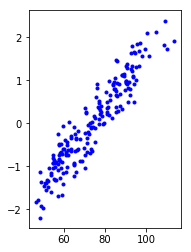

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(y, tx[:,1], marker=".", color='b')

In [20]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

[-73.63227246 -14.47570488]
Gradient Descent(0/499): loss=2829.272224438416, w0=51.54259072181176, w1=10.132993413506084
[-22.08968174  -4.34271146]
Gradient Descent(1/499): loss=267.0500258779429, w0=67.0053679383553, w1=13.172891437557825
[-6.62690452 -1.30281344]
Gradient Descent(2/499): loss=36.45002800750046, w0=71.64420110331838, w1=14.084860844773322
[-1.98807136 -0.39084403]
Gradient Descent(3/499): loss=15.696028199160635, w0=73.03585105280729, w1=14.358451666937965
[-0.59642141 -0.11725321]
Gradient Descent(4/499): loss=13.828168216410077, w0=73.45334603765397, w1=14.440528913587356
[-0.17892642 -0.03517596]
Gradient Descent(5/499): loss=13.660060817962522, w0=73.57859453310797, w1=14.46515208758217
[-0.05367793 -0.01055279]
Gradient Descent(6/499): loss=13.644931152102245, w0=73.61616908174418, w1=14.472539039780616
[-0.01610338 -0.00316584]
Gradient Descent(7/499): loss=13.643569482174817, w0=73.62744144633503, w1=14.474755125440149
[-0.00483101 -0.00094975]
Gradient Descen

Gradient Descent(402/499): loss=13.643434811522656, w0=73.63227245973111, w1=14.475704876437092
[ -1.91846539e-15   6.99712224e-17]
Gradient Descent(403/499): loss=13.643434811522656, w0=73.63227245973111, w1=14.475704876437092
[ -1.91846539e-15   6.99712224e-17]
Gradient Descent(404/499): loss=13.643434811522656, w0=73.63227245973111, w1=14.475704876437092
[ -1.91846539e-15   6.99712224e-17]
Gradient Descent(405/499): loss=13.643434811522656, w0=73.63227245973111, w1=14.475704876437092
[ -1.91846539e-15   6.99712224e-17]
Gradient Descent(406/499): loss=13.643434811522656, w0=73.63227245973111, w1=14.475704876437092
[ -1.91846539e-15   6.99712224e-17]
Gradient Descent(407/499): loss=13.643434811522656, w0=73.63227245973111, w1=14.475704876437092
[ -1.91846539e-15   6.99712224e-17]
Gradient Descent(408/499): loss=13.643434811522656, w0=73.63227245973111, w1=14.475704876437092
[ -1.91846539e-15   6.99712224e-17]
Gradient Descent(409/499): loss=13.643434811522656, w0=73.63227245973111, w1

In [21]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_figure>

In [22]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

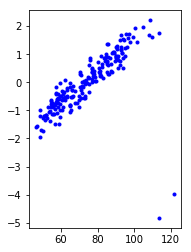

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(y, tx[:,1], marker=".", color='b')

In [24]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

[-74.06780585 -11.03489487]
Gradient Descent(0/499): loss=2869.8351145358524, w0=51.84746409844842, w1=7.7244264061924195
[-22.22034176  -3.31046846]
Gradient Descent(1/499): loss=318.2821247015965, w0=67.40170332798297, w1=10.041754328050114
[-6.66610253 -0.99314054]
Gradient Descent(2/499): loss=88.6423556165128, w0=72.06797509684336, w1=10.736952704607411
[-1.99983076 -0.29794216]
Gradient Descent(3/499): loss=67.9747763988552, w0=73.46785662750146, w1=10.945512217574597
[-0.59994923 -0.08938265]
Gradient Descent(4/499): loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
[-0.17998477 -0.02681479]
Gradient Descent(5/499): loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631798
[-0.05399543 -0.00804444]
Gradient Descent(6/499): loss=65.93222021235334, w0=74.0516072257859, w1=11.032481534481914
[-0.01619863 -0.00241333]
Gradient Descent(7/499): loss=65.93086421248087, w0=74.06294626618423, w1=11.034170866536945
[-0.00485959 -0.000724  ]
Gradient Descent(8/49

In [25]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_figure>

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)